<a href="https://colab.research.google.com/github/jy6zheng/TwitterDisasterTweets/blob/master/Twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [104]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Mounted at /content/gdrive


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.text import *
import tensorflow

In [0]:
! pip install -q kaggle

In [0]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [0]:
! chmod 600 ~/.kaggle/kaggle.json

In [0]:
! kaggle datasets list

ref                                                         title                                                size  lastUpdated          downloadCount  
----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
allen-institute-for-ai/CORD-19-research-challenge           COVID-19 Open Research Dataset Challenge (CORD-19)  280MB  2020-03-14 01:22:38          18029  
unanimad/dataisbeautiful                                    Reddit - Data is Beautiful                           10MB  2020-03-13 16:34:07            290  
rubenssjr/brasilian-houses-to-rent                          brazilian_houses_to_rent                            117KB  2020-03-15 01:12:22            351  
sudalairajkumar/novel-corona-virus-2019-dataset             Novel Corona Virus 2019 Dataset                     377KB  2020-03-20 03:35:34          62722  
kimjihoo/coronavirusdataset                                 Data

In [0]:
! kaggle competitions download -c nlp-getting-started

  0% 0.00/22.2k [00:00<?, ?B/s]
100% 22.2k/22.2k [00:00<00:00, 27.4MB/s]
  0% 0.00/965k [00:00<?, ?B/s]
100% 965k/965k [00:00<00:00, 64.3MB/s]
  0% 0.00/411k [00:00<?, ?B/s]
100% 411k/411k [00:00<00:00, 56.9MB/s]


In [107]:
path = Path(base_dir + '/data/twitter')
path.mkdir(parents=True, exist_ok=True)
path

PosixPath('/content/gdrive/My Drive/fastai-v3/data/twitter')

In [0]:
shutil.move("/content/train.csv", "/content/gdrive/My Drive/fastai-v3/data/twitter") 

In [0]:
shutil.move("/content/test.csv", "/content/gdrive/My Drive/fastai-v3/data/twitter")
shutil.move("/content/sample_submission.csv", "/content/gdrive/My Drive/fastai-v3/data/twitter")

'/content/gdrive/My Drive/fastai-v3/data/twitter/sample_submission.csv'

In [108]:
data = pd.read_csv(path/'train.csv')
data.head(2)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1


In [109]:
extension = 'csv'
filenames = ['train.csv', 'test.csv']
combined_data = pd.concat([pd.read_csv(path/f) for f in filenames ])
combined_data.fillna('None', inplace = True)
combined_data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,id,keyword,location,target,text
0,1,None,None,1,Our Deeds are the Reason of this #earthquake M...
1,4,None,None,1,Forest fire near La Ronge Sask. Canada
2,5,None,None,1,All residents asked to 'shelter in place' are ...
3,6,None,None,1,"13,000 people receive #wildfires evacuation or..."
4,7,None,None,1,Just got sent this photo from Ruby #Alaska as ...
...,...,...,...,...,...
3258,10861,None,None,None,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,None,None,None,Storm in RI worse than last hurricane. My city...
3260,10868,None,None,None,Green Line derailment in Chicago http://t.co/U...
3261,10874,None,None,None,MEG issues Hazardous Weather Outlook (HWO) htt...


In [110]:
table = data.copy()
table = table[['keyword', 'location', 'text', 'target']]
table.fillna('None', inplace= True)
table

,keyword,location,text,target
0,None,None,Our Deeds are the Reason of this #earthquake M...,1
1,None,None,Forest fire near La Ronge Sask. Canada,1
2,None,None,All residents asked to 'shelter in place' are ...,1
3,None,None,"13,000 people receive #wildfires evacuation or...",1
4,None,None,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...
7608,None,None,Two giant cranes holding a bridge collapse int...,1
7609,None,None,@aria_ahrary @TheTawniest The out of control w...,1
7610,None,None,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,None,None,Police investigating after an e-bike collided ...,1


In [0]:
bs=48

In [112]:
data_lm = (TextList.from_df(combined_data, cols='text')
 .split_by_rand_pct(0.1)
 .label_for_lm()
 .databunch())

data_lm.show_batch(2)

idx,text
0,"from xxmaj xxunk # xxmaj alaska as smoke from # wildfires xxunk into a school xxbos # rockyfire xxmaj update = > xxmaj california xxmaj hwy . 20 closed in both xxunk due to xxmaj lake xxmaj county fire - # xxunk # wildfires xxbos # flood # disaster xxmaj heavy rain causes flash flooding of streets in xxmaj xxunk , xxmaj colorado xxmaj springs areas xxbos i 'm on"
1,# xxup xxunk xxbos http : / / t.co / xxunk xxmaj twelve feared killed in xxmaj pakistani air ambulance helicopter crash http : / / t.co / xxunk xxbos xxunk waiting for an ambulance xxbos xxunk you ok ? xxmaj need a ambulance . xxmaj xxunk that was good ! http : / / t.co / xxunk xxbos xxup ambulance xxup sprinter xxup automatic xxup frontline xxup vehicle xxup


In [0]:
data_lm.save('data_lm.pkl')

In [0]:
shutil.move("/content/data_lm.pkl", "/content/gdrive/My Drive/fastai-v3/data/twitter")

'/content/gdrive/My Drive/fastai-v3/data/twitter/data_lm.pkl'

In [0]:
data_lm = load_data(path, 'data_lm.pkl', bs=bs)

In [0]:
data_lm.show_batch()

idx,text
0,"rockyfire xxmaj update = > xxmaj california xxmaj hwy . 20 closed in both xxunk due to xxmaj lake xxmaj county fire - # xxunk # wildfires xxbos # flood # disaster xxmaj heavy rain causes flash flooding of streets in xxmaj xxunk , xxmaj colorado xxmaj springs areas xxbos i 'm on top of the hill and i can see a fire in the woods ... xxbos xxmaj there"
1,xxmaj forest : xxmaj stop the xxmaj annihilation of the xxmaj salt xxmaj river xxmaj wild xxmaj horse ... https : / / t.co / xxunk via @change xxbos xxunk can you please sign and share this petition to save wild horses in xxmaj arizona . http : / / t.co / xxunk xxrep 4 ? xxbos xxup u.s xxmaj national xxmaj park xxmaj services xxmaj tonto xxmaj national xxmaj
2,too you fucking idiot ? xxbos # xxunk xxmaj attack xxup ii xxmaj xxunk xxmaj training xxmaj machine - xxmaj sets xxmaj simulation - http : / / t.co / xxunk http : / / t.co / xxunk xxbos xxmaj xxunk 's xxunk yet very xxunk response to xxmaj harper 's attack on xxmaj alberta 's xxunk . xxmaj hell xxup yeah xxmaj xxunk ! http : / / t.co
3,blazing through the roof # xxunk xxmaj fifth xxmaj xxunk xxbos xxunk xxunk haha love this ? ? xxbos xxunk xxmaj colorado is a xxmaj spanish word ( [ xxmaj latin xxunk ] meaning ' xxunk ' or ' xxunk ' ) all you xxunk are xxunk it wrong ! ! ! xxbos xxmaj why xxmaj some xxmaj traffic xxmaj is xxmaj freezing xxmaj cold xxmaj and xxmaj some xxmaj
4,tote xxmaj handbag xxmaj women xxmaj cross xxmaj body xxmaj bag xxmaj faux xxmaj leather xxmaj fashion xxmaj purse - xxmaj full reû _ http : / / t.co / xxunk http : / / t.co / xxunk xxbos new summer long thin body bag hip a word skirt xxmaj blue http : / / t.co / xxunk m http : / / t.co / xxunk xxbos xxunk } xxmaj


In [0]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


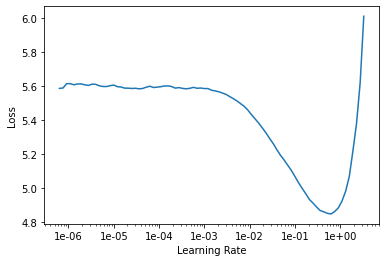

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(1, 1e-1, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.781791,3.257689,0.449735,00:08


In [0]:
learn.save('fit_head')

In [0]:
learn.load('fit_head');

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(11, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,2.785852,3.015235,0.478208,00:16
1,2.663162,2.967720,0.486111,00:16
2,2.578849,2.986003,0.490079,00:16
3,2.346081,3.001954,0.494444,00:16
4,2.067160,3.084231,0.498512,00:16
5,1.718816,3.170508,0.504233,00:16
6,1.329903,3.352941,0.503142,00:16
7,1.012765,3.475028,0.504663,00:16
8,0.764922,3.515587,0.505456,00:16
9,0.632388,3.547286,0.506713,00:16


In [0]:
learn.save('fine_tuned')

In [0]:
learn.load('fine_tuned');

In [0]:
TEXT = "I'm happy today that"
N_WORDS = 40
N_SENTENCES = 2

In [0]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

I'm happy today that you be a living hell . You 're a lot safer . If you 're a traumatised people they 'll be inundated . xxbos Drop it down on a nigga do damage ! ? ? xxbos
I'm happy today that i see a break from my emotional destruction to watch the British Columbia help xxbos Anyone else getting tons of calls on their cell phone ? Im emotional that Men 's SON absolutely been


In [0]:
learn.save_encoder('fine_tuned_enc')

In [246]:
test_df = pd.read_csv(path/'test.csv')
# test_df.fillna('None', inplace=True )
# test = TextList.from_df(test_df, cols = ['keyword', 'location', 'text'])
test
test_df

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [173]:
data_clas = (TextList.from_df(table, cols=['keyword', 'location', 'text'], vocab=data_lm.vocab)
 .split_by_rand_pct(0.2)
 .label_from_df('target')
 .add_test(test, label=None)
 .databunch())
data_clas.show_batch()

text,target
xxbos mayhem ? ? xxmaj made in the xxmaj philippines ? ? _ \n xxrep 5 ? xxup retweet \n xxrep 7 ? \n xxrep 5 ? xxup follow xxup all xxup who xxup rt \n xxrep 7 ? \n xxrep 5 ? xxup xxunk \n xxrep 7 ? \n xxrep 5 ? xxup xxunk xxup with \n xxrep 7 ? \n,0
xxbos army xxmaj pakistan . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : xxup rt xxunk : # xxunk \n \n xxmaj indian xxmaj army xxunk _ http : / / t.co / xxunk g,0
"xxbos curfew xxmaj xxunk , xxmaj australia xxup info xxup s. xxup wnd : xxunk / 6 . xxup xxunk : xxup xxunk xxup xxunk . xxup exp xxup inst xxup apch . xxup rwy 05 . xxup curfew xxup in xxup oper xxup until 2030 xxup z. xxup taxiways xxup foxtrot 5 & & xxup foxtrot 6 xxup navbl . xxup tmp : 10 .",0
xxbos terrorism xxmaj none xxmaj truth ... \n https : / / t.co / xxunk \n # xxmaj news \n # xxup bbc \n # xxup cnn \n # xxmaj islam \n # xxmaj truth \n # god \n # xxup isis \n # terrorism \n # xxmaj quran \n # xxmaj lies http : / / t.co /,0
xxbos terrorism xxmaj none xxmaj truth ... \n https : / / t.co / xxunk \n # xxmaj news \n # xxup bbc \n # xxup cnn \n # xxmaj islam \n # xxmaj truth \n # god \n # xxup isis \n # terrorism \n # xxmaj quran \n # xxmaj lies http : / / t.co /,1


In [174]:
data_clas.save('data_clas.pkl')
shutil.move("/content/data_clas.pkl", "/content/gdrive/My Drive/fastai-v3/data/twitter")

'/content/gdrive/My Drive/fastai-v3/data/twitter/data_clas.pkl'

In [0]:
data_clas = load_data(path, 'data_clas.pkl', bs=bs)

In [176]:
data_clas.show_batch()

text,target
xxbos mayhem ? ? xxmaj made in the xxmaj philippines ? ? _ \n xxrep 5 ? xxup retweet \n xxrep 7 ? \n xxrep 5 ? xxup follow xxup all xxup who xxup rt \n xxrep 7 ? \n xxrep 5 ? xxup xxunk \n xxrep 7 ? \n xxrep 5 ? xxup xxunk xxup with \n xxrep 7 ? \n,0
"xxbos curfew xxmaj xxunk , xxmaj australia xxup info xxup r. xxup curfew xxup in xxup oper xxup until 2030 xxup z. xxup taxiways xxup foxtrot 5 & & xxup foxtrot 6 xxup navbl . xxup wnd : xxunk / 5 . xxup exp xxup inst xxup apch . xxup rwy 05 . xxup xxunk . xxup tmp : 10 . xxup xxunk : xxunk .",0
xxbos terrorism xxmaj none xxmaj truth ... \n https : / / t.co / xxunk \n # xxmaj news \n # xxup bbc \n # xxup cnn \n # xxmaj islam \n # xxmaj truth \n # god \n # xxup isis \n # terrorism \n # xxmaj quran \n # xxmaj lies http : / / t.co /,1
xxbos terrorism xxmaj none xxmaj truth ... \n https : / / t.co / xxunk \n # xxmaj news \n # xxup bbc \n # xxup cnn \n # xxmaj islam \n # xxmaj truth \n # god \n # xxup isis \n # terrorism \n # xxmaj quran \n # xxmaj lies http : / / t.co /,0
xxbos terrorism xxmaj none xxmaj truth ... \n https : / / t.co / xxunk \n # xxmaj news \n # xxup bbc \n # xxup cnn \n # xxmaj islam \n # xxmaj truth \n # god \n # xxup isis \n # terrorism \n # xxmaj quran \n # xxmaj lies http : / / t.co /,0


In [0]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('fine_tuned_enc');

In [0]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


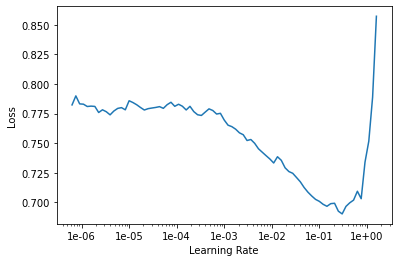

In [0]:
learn.recorder.plot()

In [178]:
learn.fit_one_cycle(1, 2e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.585305,0.509877,0.773325,00:10


In [0]:
learn.save('first')

In [0]:
learn.load('first');

In [181]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.538236,0.464572,0.795007,00:10


In [0]:
learn.save('second')

In [0]:
learn.load('second');

In [184]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.493215,0.452168,0.804205,00:10


In [0]:
learn.save('third')

In [0]:
learn.load('third');

In [187]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.444713,0.443437,0.799606,00:10
1,0.410987,0.438832,0.806176,00:10


In [0]:
learn.save('final')

In [0]:
learn.export()

In [0]:
learn.load('final');

In [208]:
learn.predict(['None' 'None' 'Just happened a terrible car crash'])

(Category 1, tensor(1), tensor([0.0584, 0.9416]))

In [0]:
values =[]
for i in test:
  values.append(learn.predict(i)[0])

In [228]:
preds, targets = learn.get_preds(DatasetType.Test)

In [229]:
targets

tensor([0, 0, 0,  ..., 0, 0, 0])

In [0]:
submission = []
str(values)
for entry in values:
  cat_entry = str(entry)
  for category in cat_entry:
    number = int(category[-1])
    submission.append(number)

In [0]:
submission

In [240]:
submission_tf = tensorflow.convert_to_tensor(submission)
submission_tf

<tf.Tensor 'Const_1:0' shape=(3263,) dtype=int32>

In [150]:
learn=load_learner('/content/gdrive/My Drive/fastai-v3/data/twitter/',test=test)

In [153]:
y

tensor([0, 0, 0,  ..., 0, 0, 0])

In [0]:
final_df = pd.DataFrame({'id': test_df['id'], 'target': submission})

In [242]:
final_df

,id,target
0,0,0
1,2,1
2,3,1
3,9,0
4,11,1
...,...,...
3258,10861,1
3259,10865,0
3260,10868,1
3261,10874,1


In [0]:
final_df.to_csv('/content/gdrive/My Drive/fastai-v3/data/twitter/submission.csv', header=True, index=False)